In [ ]:
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from datetime import date
from datetime import datetime
#PREPROCESSING DATA
raw = pd.read_csv("/content/nycofficedataset.csv")
raw.columns=["cusip_number", "sedol_number", "local_currency_code", "trade_country_name", "security_name", "security_description", "maturity_date", "interest_rate", "original_face", "shares_par_value", "base_market_value", "base_total_cost", "base_unrealized_gain_loss","base_accrued_interest", "local_market_value", "local_total_cost_amount", "local_unrealized_gain_loss","local_accrued_interest","period_end_date","asset_class","investment_type_name", "major_industry_name", "minor_industry_name","moodys_quality_rating","s_and_p_quality_rating", "direct_trust_holding"]
print(raw.head())
equity = raw[raw['asset_class'] == 'EQUITY'].index.to_numpy()
raw = raw.drop(equity, axis = 0)
cash = raw[raw['asset_class'] == 'CASH'].index.to_numpy()
raw = raw.drop(cash, axis = 0)
nullir = raw[raw['interest_rate'].isnull()].index.tolist()
raw = raw.drop(nullir, axis = 0)
raw = raw.drop('original_face', axis = 1)
raw = raw.drop('minor_industry_name', axis = 1)
#raw = raw.drop('blank', axis = 1)
raw = raw.drop('period_end_date', axis = 1)
raw.info()
moodynull = raw[raw['moodys_quality_rating'].isnull()].index.tolist()
raw = raw.drop(moodynull, axis = 0)
raw = raw.drop('local_market_value', axis = 1)
raw = raw.drop('cusip_number', axis = 1)
raw = raw.drop('sedol_number', axis = 1)
raw = raw.drop('local_currency_code', axis = 1)
raw = raw.drop('trade_country_name', axis = 1)
raw = raw.drop('security_name', axis = 1)
raw = raw.drop('security_description', axis = 1)
#raw = raw.drop('maturity_date', axis = 1)
raw = raw.drop('local_accrued_interest', axis = 1)
print(raw['asset_class'].unique())
raw = raw.drop('asset_class', axis = 1)
raw = raw.drop('major_industry_name', axis = 1)
def moody(y):
  if y == "C":
    return 1
  elif y == "Ca":
    return 2
  elif y == "Caa3":
    return 3
  elif y == "Caa2":
    return 4
  elif y == "Caa1":
    return 5
  elif y == "B3":
    return 6
  elif y == "B2":
    return 7
  elif y == "B1":
    return 8
  elif y == "Ba3":
    return 9
  elif y == "Ba2":
    return 10
  elif y == "Ba1":
    return 11
  elif y == "Baa3":
    return 12
  elif y == "Baa2":
    return 13
  elif y == "Baa1":
    return 14
  elif y == "Baa3":
    return 15
  elif y == "A3":
    return 16
  elif y == "A2":
    return 17
  elif y == "A1":
    return 18
  elif y == "Aa3":
    return 19
  elif y == "Aa2":
    return 20
  elif y == "Aa1":
    return 21
  elif y == "Aaa":
    return 22
  elif y == "OTHER ASSET BACKED":
    return 10
  elif y == "BANK LOAN":
    return 10
  else:
    return 6
def sp(y):
  if y == "D":
    return 1
  elif y == "C":
    return 2
  elif y == "CC":
    return 3
  elif y == "CCC-":
    return 4
  elif y == "CCC":
    return 5
  elif y == "CCC+":
    return 6
  elif y == "B-":
    return 7
  elif y == "B":
    return 8
  elif y == "B+":
    return 9
  elif y == "BB-":
    return 10
  elif y == "BB":
    return 11
  elif y == "BB+":
    return 12
  elif y == "BBB-":
    return 13
  elif y == "BBB":
    return 14
  elif y == "BBB+":
    return 15
  elif y == "A-":
    return 16
  elif y == "A":
    return 17
  elif y == "A+":
    return 18
  elif y == "AA-":
    return 19
  elif y == "AA":
    return 20
  elif y == "AA+":
    return 21
  elif y == "AAA":
    return 22
  else:
    return 6
raw.info()
raw['moody'] = raw['moodys_quality_rating'].apply(moody)
raw['sp'] = raw['s_and_p_quality_rating'].apply(sp)
def convert(x):
  today = datetime.today()
  maturity = datetime.strptime(x, '%m/%d/%y')
  delta = maturity - today
  return delta.days
raw["maturity"] = raw['maturity_date'].apply(convert)
raw = raw.drop('maturity_date', axis = 1)
raw = raw.drop('direct_trust_holding', axis = 1)
print(raw["moodys_quality_rating"].value_counts())
print(raw["s_and_p_quality_rating"].value_counts())
raw["interest_rate"] = raw.interest_rate.astype(float)
raw = raw.drop('moodys_quality_rating', axis = 1)
raw = raw.drop('s_and_p_quality_rating', axis = 1)
num_pipeline = Pipeline([
                 ("normal", Normalizer()),
                 ("scaler", StandardScaler())
])
num_attributes = list(raw.drop("investment_type_name", axis = 1))
cat_attributes = ["investment_type_name"]
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attributes),
        ("cat", OneHotEncoder(), cat_attributes)
])
rawtest = full_pipeline.fit_transform(raw) 
raw.info()



  cusip_number sedol_number  ... s_and_p_quality_rating direct_trust_holding
0   '68245XAC3     'BF191X0  ...                     B+               Direct
1   '68245XAA7     'BR23ZS8  ...                     B-               Direct
2   '90131HBP9     'BWX5TS6  ...                   BBB+               Direct
3   '90131HBN4     'BWXSBS9  ...                   BBB+               Direct
4   '002824BM1     'BD3FM06  ...                    BBB               Direct

[5 rows x 26 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2663 entries, 0 to 3506
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cusip_number                2663 non-null   object 
 1   sedol_number                2663 non-null   object 
 2   local_currency_code         2663 non-null   object 
 3   trade_country_name          2663 non-null   object 
 4   security_name               2663 non-null   object 
 5   secu

In [ ]:

raw.reset_index(inplace=True, drop = True)
#raw.drop('index', inplace=True, axis = 1)
#raw.drop('level_0', inplace=True, axis = 1)
raw

,interest_rate,shares_par_value,base_market_value,base_total_cost,base_unrealized_gain_loss,base_accrued_interest,local_total_cost_amount,local_unrealized_gain_loss,investment_type_name,moody,sp,maturity
0,4.250,175000.00,173895.75,175000.00,-1104.25,909.02,175000.00,-1104.25,CORPORATE BONDS,9,9,904
1,6.000,1150000.00,1191687.50,1184125.00,7562.50,17250.00,1184125.00,7562.50,CORPORATE BONDS,6,7,129
2,6.900,30000.00,39602.40,36768.00,2834.40,782.00,36768.00,2834.40,CORPORATE BONDS,14,15,6474
3,7.850,255000.00,367641.15,265419.30,102221.85,6672.50,265419.30,102221.85,CORPORATE BONDS,14,15,6307
4,3.875,25000.00,25713.25,25044.93,668.32,285.24,25044.93,668.32,CORPORATE BONDS,12,14,1392
...,...,...,...,...,...,...,...,...,...,...,...,...
2052,0.000,707852.32,711037.65,709444.91,1592.74,0.00,709444.91,1592.74,BANK LOAN,6,6,756
2053,8.500,294456.97,283414.83,298873.82,-15458.99,6257.21,298873.82,-15458.99,CORPORATE BONDS,3,5,312
2054,0.000,770455.99,755432.10,752037.37,3394.73,0.00,752037.37,3394.73,BANK LOAN,6,6,-53
2055,0.000,400438.22,403291.34,396433.84,6857.50,0.00,396433.84,6857.50,BANK LOAN,6,6,-162


In [ ]:
raw.shape

(2057, 12)

<Figure size 576x576 with 0 Axes>

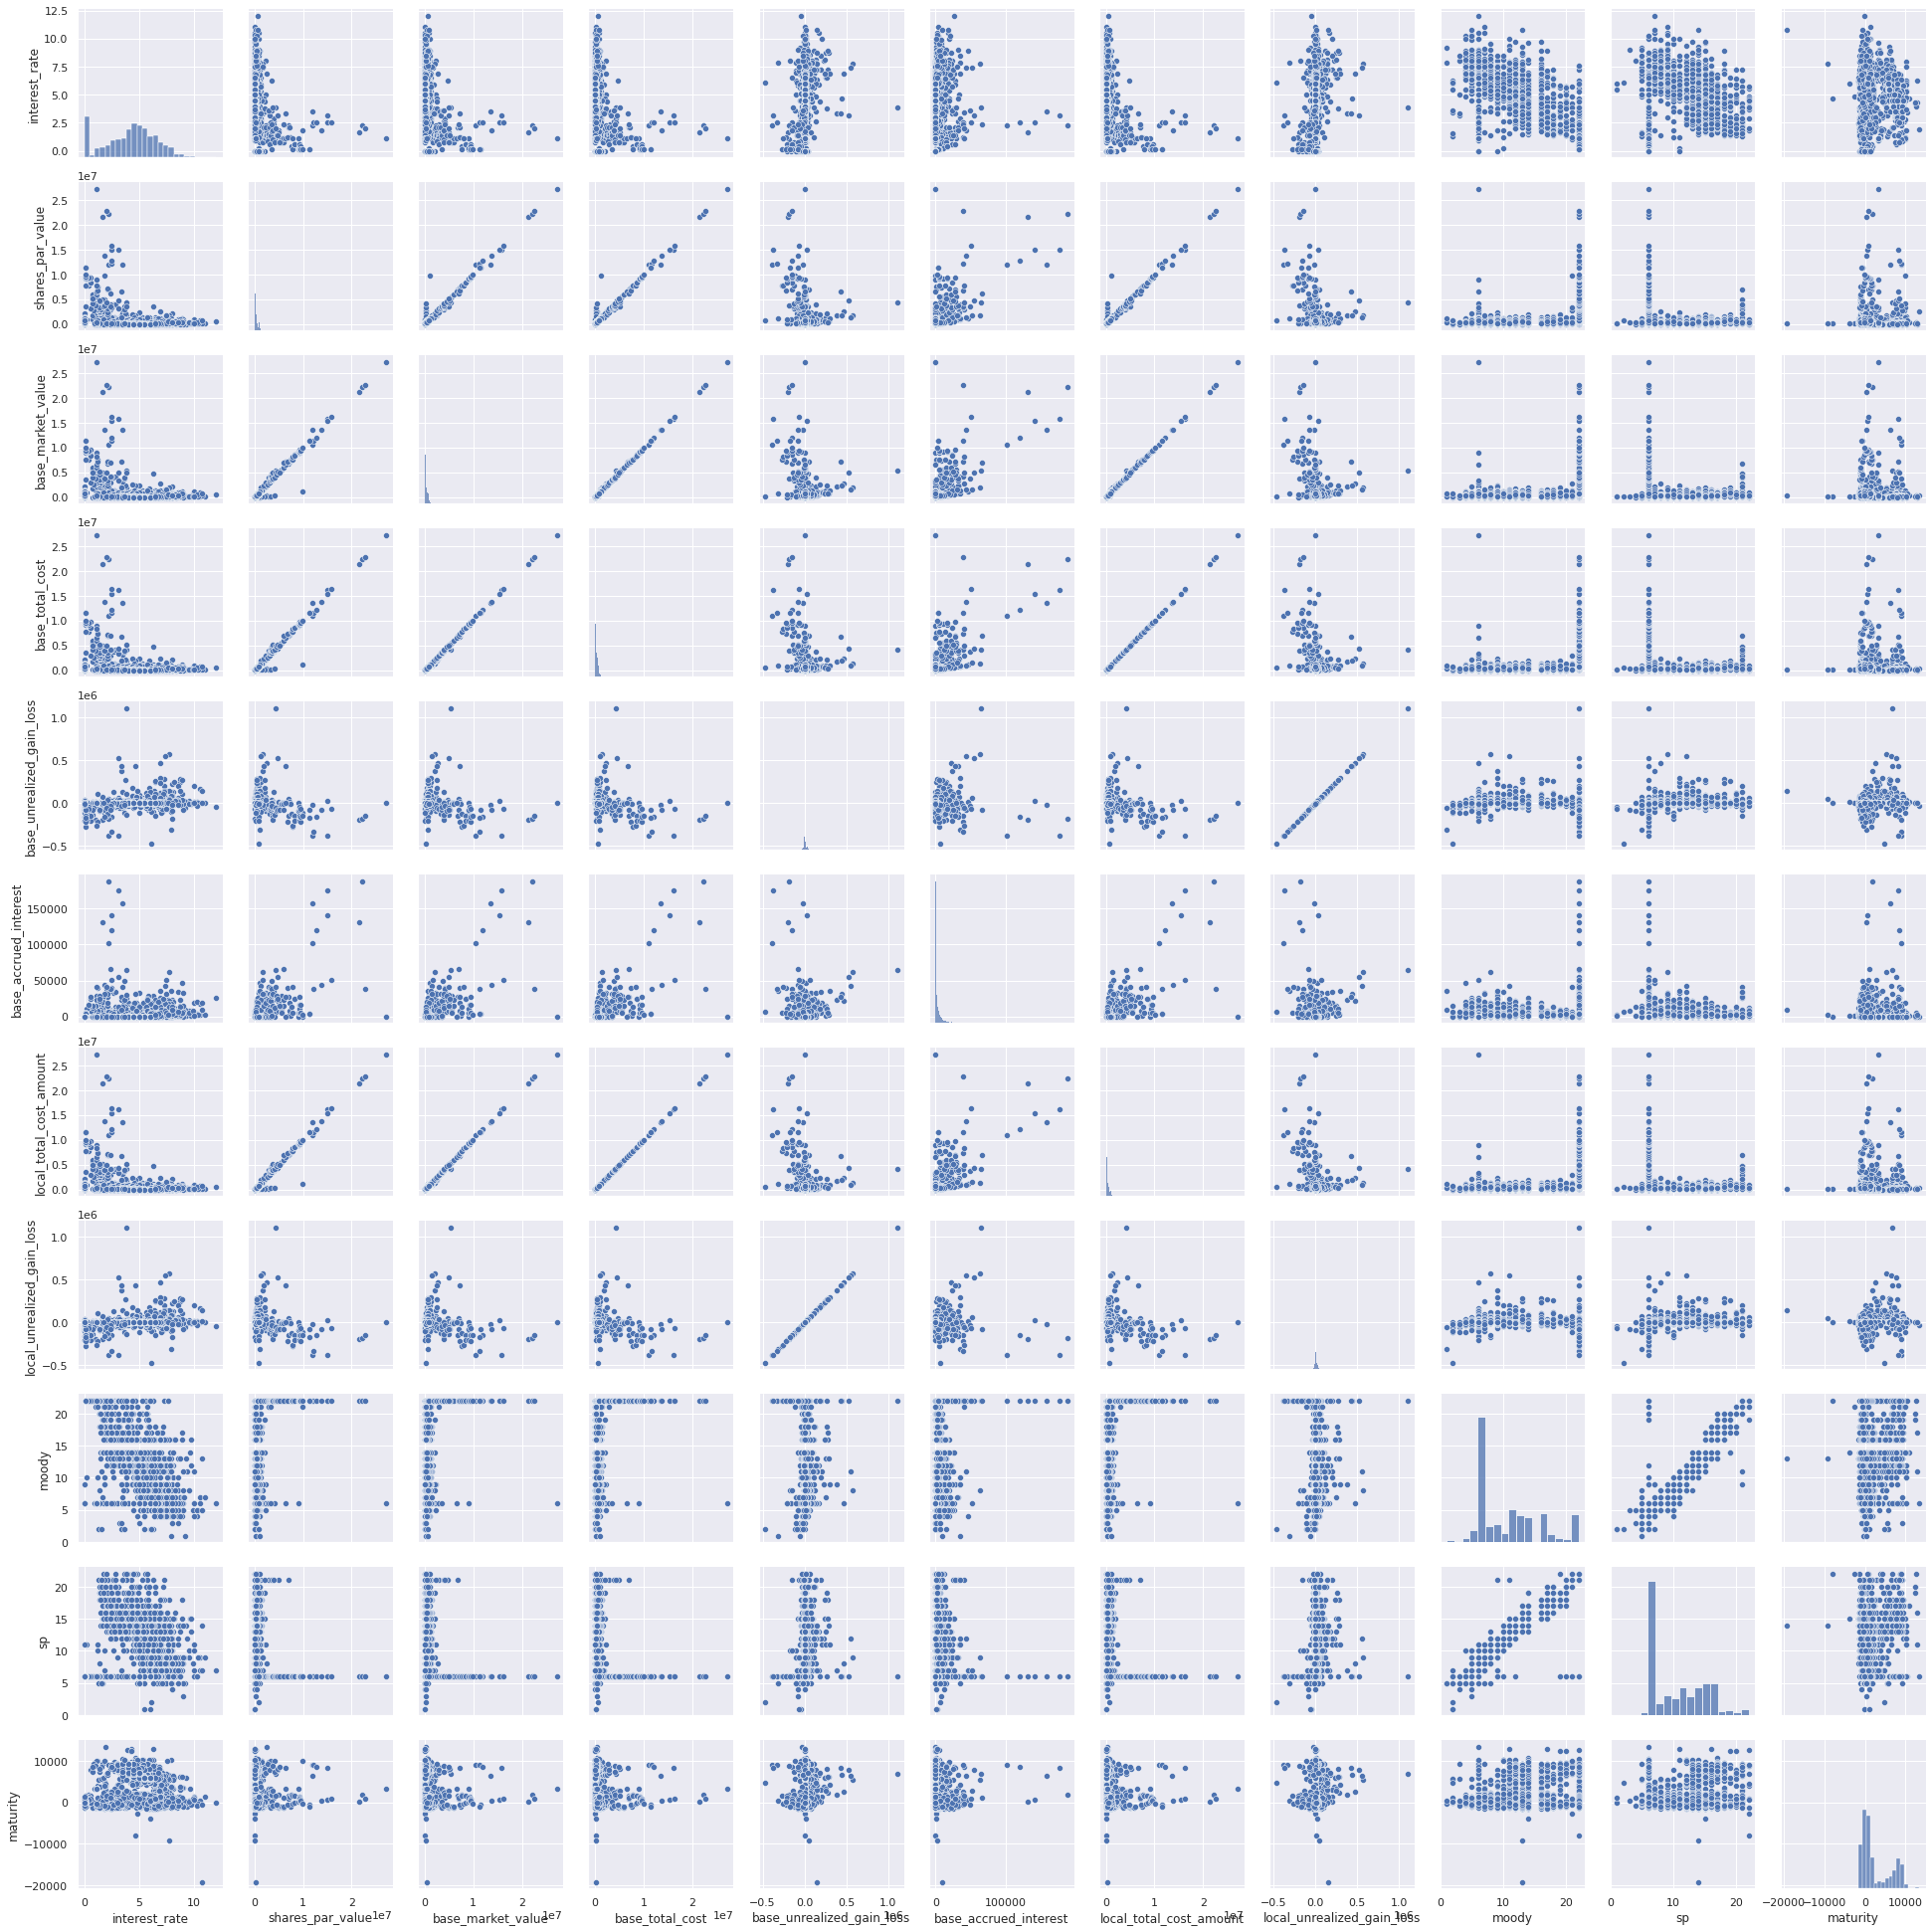

In [ ]:
#DATA VISUALIZATION
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (8,8))
sns.pairplot(raw)
plt.show()

1 : 23766.050072921782
2 : 17615.603016157256
3 : 12701.877287452557
4 : 10082.386631989983
5 : 8169.070479683378
6 : 6780.463982398658
7 : 5627.908853361189
8 : 4744.554263059662
9 : 4278.118924801159
10 : 3818.159214013989
11 : 3484.207725740442
12 : 3199.6490217436153
13 : 3004.633059575957
14 : 2824.550132127748


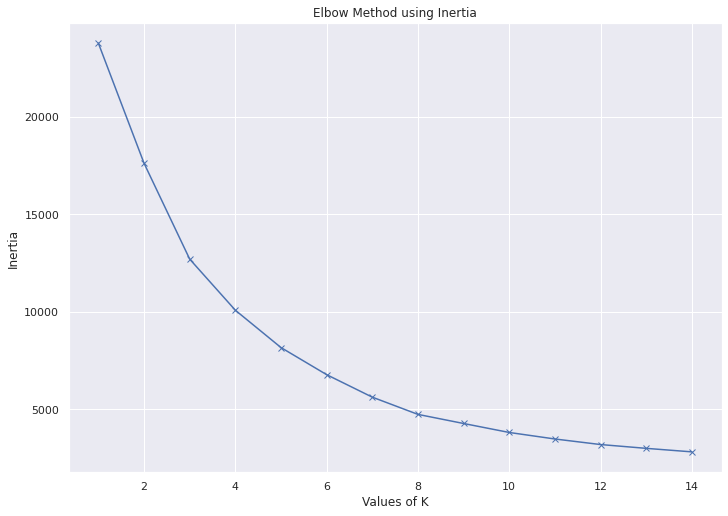

In [ ]:
#CLUSTERING
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics 
from scipy.spatial.distance import cdist

#Fitting the right amount of clusters
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,15) 
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(rawtest) 
    kmeanModel.fit(rawtest)     
      
    distortions.append(sum(np.min(cdist(rawtest, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / rawtest.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(rawtest, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / rawtest.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('Elbow Method using Inertia') 
plt.show()  


In [ ]:
#Based on the elbow plots for inertia, let's go with 6 clusters
from random import randint
from sklearn.preprocessing import MinMaxScaler
import math
km = KMeans(n_clusters=6).fit(rawtest)
lab = pd.DataFrame(km.labels_)
print(lab[0].value_counts())
print(raw.shape)
raw['labels'] = lab
#for i in range(km.labels_.size):
  #raw.at[i,'labels'] = int(km.labels_[i])
print(raw.shape)


0    1177
3     641
5     161
1      68
4       9
2       1
Name: 0, dtype: int64
(2057, 12)
(2057, 13)


Counts of each unique cluster
0    1177
3     641
5     161
1      68
4       9
2       1
Name: labels, dtype: int64
The means for each cluster:
        interest_rate  base_market_value  ...         sp     maturity
labels                                    ...                        
0            3.095684      873282.325692  ...   9.924384  2360.277825
1            5.019170        4337.931324  ...   6.132353  7679.897059
2            7.566000          79.490000  ...  16.000000   -69.000000
3            5.749710      341687.785913  ...  11.634945  2070.149766
4            1.325390      259063.451111  ...   6.000000  8204.000000
5            6.416855      375293.805031  ...  12.204969  4339.031056

[6 rows x 6 columns]
The standard deviations for each cluster:
        interest_rate  base_market_value  ...        sp     maturity
labels                                    ...                       
0            2.198231       2.242810e+06  ...  4.687720  3563.178971
1            0.954109   

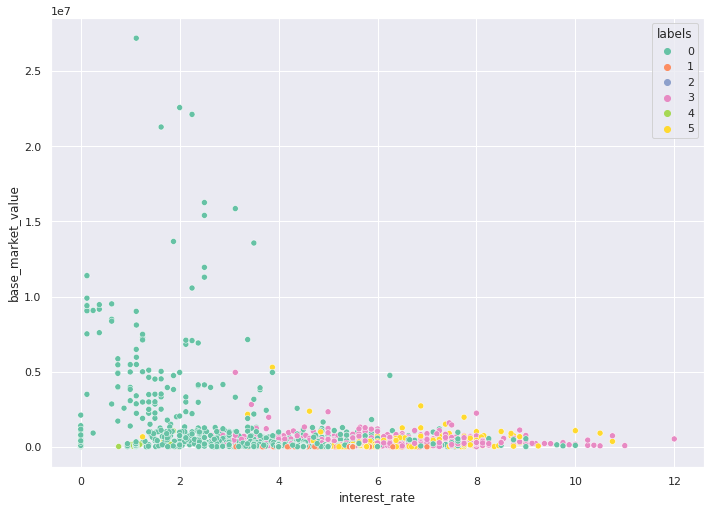

In [ ]:
colors = []
for i in range(7):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
#for i, j in enumerate(km.labels_):
#    color = colors[int(j)]
#    plt.xlabel('Interest Rate') 
#    plt.ylabel('Base Market Value')
#    plt.scatter(raw.at[i,'int_rate'], raw.at[i,'base_market_value'], color = color, s = 30, label = color)
sns.scatterplot(x=raw['interest_rate'], y=raw['base_market_value'], hue = raw.labels, palette="Set2")
print('Counts of each unique cluster')
print(raw['labels'].value_counts())
numerics = raw.drop(['shares_par_value','base_total_cost','base_unrealized_gain_loss','local_total_cost_amount','local_unrealized_gain_loss','investment_type_name'], axis = 1)
print("The means for each cluster:")
print(numerics.groupby('labels').mean())
print("The standard deviations for each cluster:")
print(numerics.groupby('labels').std())
print(numerics.groupby('moody').mean())
#print(numerics.groupby('investment_type_name').mean())
#quants = raw.drop(['investment_type_name','labels',axis = 0])
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(raw.drop(['investment_type_name','labels'], axis = 1)))
df_scaled.insert(8,'investment_type_name', raw['investment_type_name'])
df_scaled.insert(12,'labels', raw['labels'])
df_scaled.columns = raw.columns
#df_scaled = df_scaled.drop('lab',axis = 1)
df_scaled = df_scaled.drop(['shares_par_value','base_total_cost','base_unrealized_gain_loss','local_total_cost_amount','local_unrealized_gain_loss','investment_type_name'], axis = 1)
df_mean = df_scaled.groupby('labels').mean()
df_std = df_scaled.groupby('labels').std()
print(df_mean)
print(df_std)


In [ ]:
df_scaled

,interest_rate,base_market_value,base_accrued_interest,moody,sp,maturity,labels
0,0.354167,0.006395,0.004841,0.380952,0.380952,0.617166,0
1,0.500000,0.043840,0.091861,0.238095,0.285714,0.593264,3
2,0.575000,0.001454,0.004164,0.619048,0.666667,0.788953,3
3,0.654167,0.013523,0.035533,0.619048,0.666667,0.783802,5
4,0.322917,0.000943,0.001519,0.523810,0.619048,0.632217,3
...,...,...,...,...,...,...,...
2052,0.000000,0.026157,0.000000,0.238095,0.238095,0.612602,0
2053,0.708333,0.010424,0.033321,0.095238,0.190476,0.598908,3
2054,0.000000,0.027790,0.000000,0.238095,0.238095,0.587651,0
2055,0.000000,0.014834,0.000000,0.238095,0.238095,0.584289,0


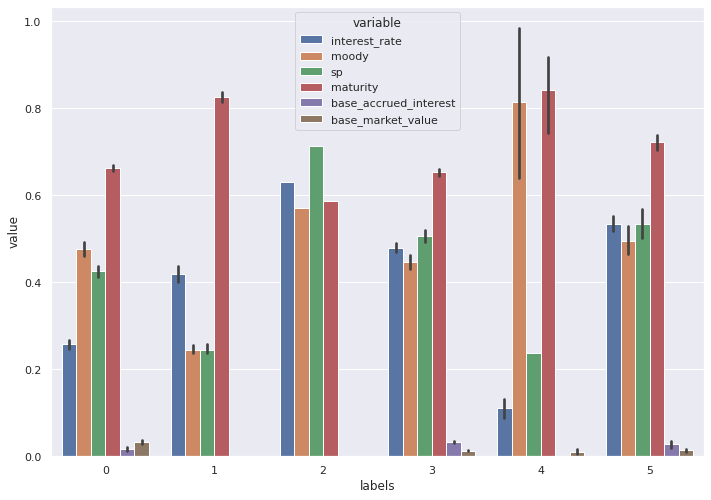

In [ ]:
results = pd.DataFrame(columns=['Variable', 'Var'])
for column in df_mean.columns[0:]:
    results.loc[len(results), :] = [column, np.var(df_mean[column])]
selected_columns = list(results.sort_values(
        'Var', ascending=False,
    ).head(7).Variable.values) + ['labels']
tidy = df_scaled[selected_columns].melt(id_vars='labels')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='labels', y='value', hue='variable', data=tidy)

There are a few observations that can give us inisghts into the NYC Board of Education's investment holdings. After running the k-means algorithm on the securities, we can observe that 1177 instances fall into the first cluster (cluster 0.0), 641 fall into the fourth cluster (cluster 3.0), 161 fall into the sixth (cluster 5.0) and 68 fall into the fourth(cluster 1.0). The most populated cluster generally has securities with the highest base market values, close to the average interest rate amongst the 6 clusters (200 basis points lower in interest amongst the 3 most populated groups) and close to the average in ratings, after standardization. The second most populated cluster (cluster 3.0) has significantly higher interest rates, lower moody's ratings, higher s&p ratings and lower market values than the first. The third cluster has market values similar to cluster 3.0, the highest interest, and the highest maturity likely pointing to long-term, stable investments. The last cluster contains results with the highest maturity but lowest ratings, indicative of riskier investments. An index catered towards a client with holdings like this should have similarly distributed attributes where any outliers can be further examined in the least populated clusters like cluster 4.0 (9 instances) and cluster 2.0 (1 instance). 

In [ ]:
#CLUSTER COUNTS 
"""
0    1177
3     641
5     161
1      68
4       9
2       1
"""

In [ ]:
outlier1 = raw[raw['labels'] == 4]
outlier1.head(9)

,interest_rate,shares_par_value,base_market_value,base_total_cost,base_unrealized_gain_loss,base_accrued_interest,local_total_cost_amount,local_unrealized_gain_loss,investment_type_name,moody,sp,maturity,labels
140,1.05710,882323.76,49345.72,58228.21,-8882.49,0.0,58228.21,-8882.49,CMO,22,6,9793,4
268,1.92359,2539869.57,288398.13,313636.04,-25237.91,0.0,313636.04,-25237.91,CMO,6,6,13317,4
302,1.87416,9817349.81,1061069.97,1175442.10,-114372.13,0.0,1175442.10,-114372.13,CMO,21,6,10005,4
339,1.01257,2841758.00,151260.53,182177.38,-30916.85,0.0,182177.38,-30916.85,CMO,21,6,9757,4
378,1.20383,3376670.25,202018.41,227133.87,-25115.46,0.0,227133.87,-25115.46,CMO,21,6,9854,4
515,0.76654,1033036.25,26037.47,38466.72,-12429.25,0.0,38466.72,-12429.25,CMO,22,6,63,4
516,1.18771,2174990.64,142759.64,185413.60,-42653.96,0.0,185413.60,-42653.96,CMO,22,6,1128,4
872,1.81098,1585743.46,167219.03,182762.33,-15543.30,0.0,182762.33,-15543.30,CMO,22,6,10035,4
1422,1.09203,4158043.26,243462.16,285535.45,-42073.29,0.0,285535.45,-42073.29,CMO,6,6,9884,4


In [ ]:
outlier2 = raw[raw['labels'] == 2]
outlier2.head()

,interest_rate,shares_par_value,base_market_value,base_total_cost,base_unrealized_gain_loss,base_accrued_interest,local_total_cost_amount,local_unrealized_gain_loss,investment_type_name,moody,sp,maturity,labels
365,7.566,74.29,79.49,68.09,11.4,1.65,68.09,11.4,CORPORATE BONDS,13,16,-69,2


In [ ]:
mostpopulatedcluster = raw[raw['labels'] == 0]
print(mostpopulatedcluster['investment_type_name'].unique())

['CORPORATE BONDS' 'OTHER ASSET BACKED' 'CMO' 'CONVERTIBLE BONDS'
 'GOVERNMENT ISSUES' 'MUNICIPALS' 'BANK LOAN' 'FHLMC' 'FNMA' 'GNMA II'
 'GNMA I' 'STIF-TYPE INSTRUMENT']


In [ ]:
secondmostpopulatedcluster = raw[raw['labels'] == 3]
print(secondmostpopulatedcluster['investment_type_name'].unique())

['CORPORATE BONDS' 'CONVERTIBLE BONDS' 'MUNICIPALS' 'GOVERNMENT ISSUES']


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


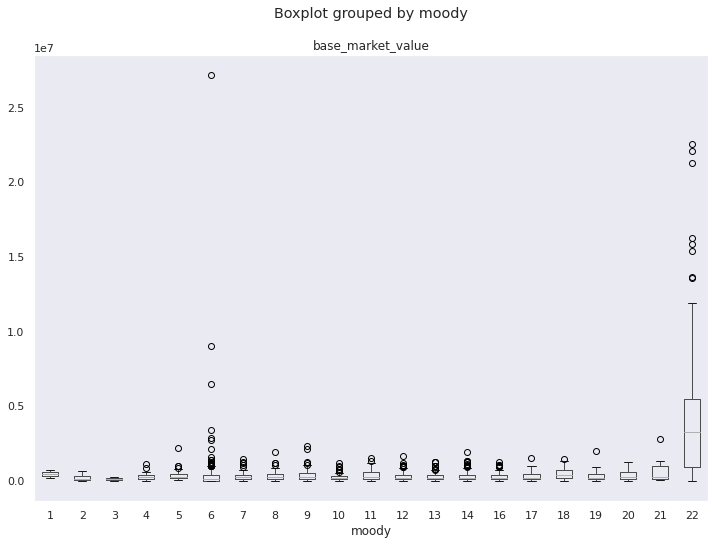

In [ ]:
raw.boxplot(by='moody', column = ['base_market_value'], grid = False)